In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
imp_gt   = np.zeros((8,4))
imp_grad = np.zeros((8,4)) 
imp_perm = np.zeros((8,4))
imp_lime = np.zeros((8,4))
imp_shap = np.zeros((8,4))

for i in range(8):
    imp_gt[i] = np.load('F'+str(i)+'_imp_gt.npy')
    imp_grad[i] = np.load('F'+str(i)+'_imp_grad.npy')
    imp_perm[i] = np.load('F'+str(i)+'_imp_perm.npy')
    imp_lime[i] = np.load('F'+str(i)+'_imp_lime.npy')
    imp_shap[i] = np.load('F'+str(i)+'_imp_shap.npy')
    
idx = [imp_perm[7]<0]
imp_perm[7,idx[0]] = 0
imp_perm[7] = imp_perm[7]/sum(imp_perm[7])
imp_agg = np.mean((imp_grad, imp_lime, imp_perm, imp_shap),0)

test_acc = np.array([95 , 93, 98, 99, 92, 99, 93, 93])

In [4]:
import os 
os.path.exists('C:\\Users\\MUNEE\\OneDrive - Michigan State University\\CMSE\\Midi_Lab\\Publications_Talks')

True

In [5]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Ariel']
fsz=14
save_dir = 'C:\\Users\\MUNEE\\OneDrive - Michigan State University\\CMSE\\Midi_Lab\\Publications_Talks\\Journal_paper\\'

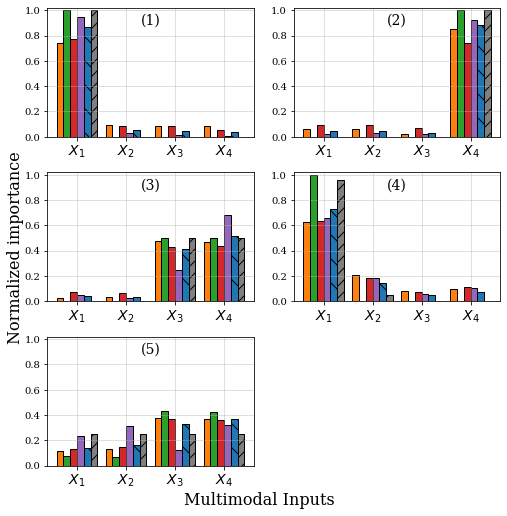

In [114]:

total_w = 2.5
n_bars = 6
bar_w = total_w / n_bars
xlabel = ['$X_1$', '$X_2$','$X_3$','$X_4$']
x = np.array([0,3,6,9])
x_offset = (np.arange(n_bars) - n_bars / 2) * bar_w + bar_w / 2

from matplotlib.font_manager import FontProperties
font = FontProperties(size=fsz)

fig, ax = plt.subplots(3,2,figsize=(7,7))
select_subset = [0,3,5,7,6,7]

fig.text(0.5, -0.01, 'Multimodal Inputs', ha='center', fontsize=16)
fig.text(-0.00, 0.5, 'Normalized importance', va='center', rotation='vertical', fontsize=16)


for i in range(3):
    for j in range(2):
        idx = select_subset[i*2+j]
        if i*2+j > 4:
            continue 
        else:
            ax[i][j].bar(x+x_offset[0] ,imp_grad[idx],  edgecolor='k',width=bar_w, capsize=2, color='C1', label='GRAD')
            ax[i][j].bar(x+x_offset[1] ,imp_perm[idx],  edgecolor='k',width=bar_w, capsize=2, color='C2', label='PERM')
            ax[i][j].bar(x+x_offset[2] ,imp_lime[idx],  edgecolor='k',width=bar_w, capsize=2, color='C3',  label='LIME')
            ax[i][j].bar(x+x_offset[3] ,imp_shap[idx],  edgecolor='k',width=bar_w, capsize=2, color='C4',  label='SHAP')
            ax[i][j].bar(x+x_offset[4] ,imp_agg[idx],  edgecolor='k',width=bar_w, capsize=2, hatch='\\', color='C0',  label='AGG')
            ax[i][j].bar(x+x_offset[5] ,imp_gt[idx],  edgecolor='k', width=bar_w, capsize=2, hatch='//', color='C7' , label='GT')
            ax[i][j].text(0.5, 0.9,'('+str(i*2+j+1)+')', horizontalalignment='center', verticalalignment='center', transform=ax[i][j].transAxes, fontproperties=font)
            ax[i][j].set_xticks(x)
            ax[i][j].set_xticklabels(xlabel, fontproperties=font)
            ax[i][j].set_ylim([0,1.02])
            ax[i][j].grid(alpha=0.5)
            


# ax[1][0].set_ylabel('Normalized importance', fontproperties=font)
# ax[3][1].set_xlabel('Modalities', fontproperties=font2)
# ax[1][0].set_xlabel('Modalities', fontproperties=font2)
ax[2, 1].axis('off')  # Hide the axes
# ax[0][1].legend(fontsize=16, bbox_to_anchor=(2.5,0.5), loc='upper right')
fig.tight_layout()
fig.savefig(save_dir+'Synth_input_imp_MM.png', dpi = 300, bbox_inches="tight")




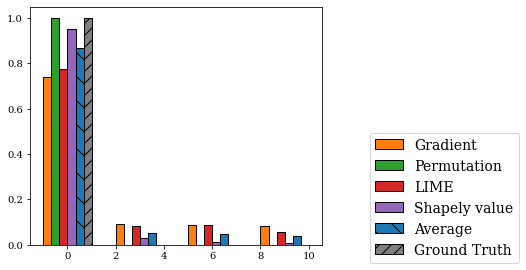

In [112]:
idx=0
fig, ax = plt.subplots( 1,figsize=(10,4))
ax.bar(x+x_offset[0] ,imp_grad[idx],  edgecolor='k',width=bar_w, capsize=2, color='C1', label='Gradient')
ax.bar(x+x_offset[1] ,imp_perm[idx],  edgecolor='k',width=bar_w, capsize=2, color='C2', label='Permutation')
ax.bar(x+x_offset[2] ,imp_lime[idx],  edgecolor='k',width=bar_w, capsize=2, color='C3',  label='LIME')
ax.bar(x+x_offset[3] ,imp_shap[idx],  edgecolor='k',width=bar_w, capsize=2, color='C4',  label='Shapely value')
ax.bar(x+x_offset[4] ,imp_agg[idx],  edgecolor='k',width=bar_w, capsize=2, hatch='\\', color='C0',  label='Average')
ax.bar(x+x_offset[5] ,imp_gt[idx],  edgecolor='k', width=bar_w, capsize=2, hatch='//', color='C7' , label='Ground Truth')
                      
ax.legend(fontsize=14, bbox_to_anchor=(1.7,0.5), loc='upper right')
fig.tight_layout()
fig.savefig(save_dir+'Synth_legend.png', dpi = 300, bbox_inches="tight")




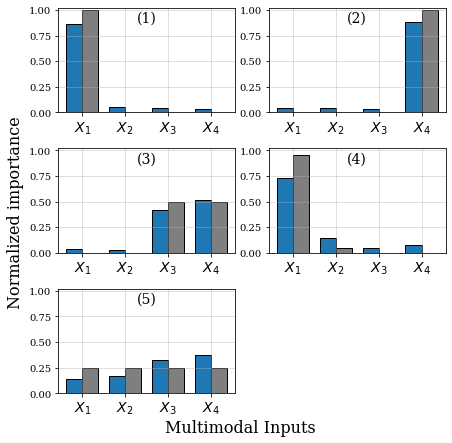

In [89]:

total_w = 1.5
n_bars = 2
bar_w = total_w / n_bars
xlabel = ['$X_1$', '$X_2$','$X_3$','$X_4$']
x = np.array([0,2,4,6])
x_offset = (np.arange(n_bars) - n_bars / 2) * bar_w + bar_w / 2

from matplotlib.font_manager import FontProperties
font = FontProperties(size=fsz)

fig, ax = plt.subplots(3,2,figsize=(6,6))
select_subset = [0,3,5,7,6,7]

fig.text(0.5, -0.01, 'Multimodal Inputs', ha='center', fontsize=16)
fig.text(-0.04, 0.5, 'Normalized importance', va='center', rotation='vertical', fontsize=16)


for i in range(3):
    for j in range(2):
        idx = select_subset[i*2+j]
        if i*2+j > 4:
            continue 
        else:
            ax[i][j].bar(x+x_offset[0] ,imp_agg[idx],  edgecolor='k',width=bar_w, capsize=2, color='C0',  label='AGG')
            ax[i][j].bar(x+x_offset[1] ,imp_gt[idx],  edgecolor='k', width=bar_w, capsize=2, color='C7' , label='GT')
            ax[i][j].text(0.5, 0.9,'('+str(i*2+j+1)+')', horizontalalignment='center', verticalalignment='center', transform=ax[i][j].transAxes, fontproperties=font)
            ax[i][j].set_xticks(x)
            ax[i][j].set_xticklabels(xlabel, fontproperties=font)
            ax[i][j].set_ylim([0,1.02])
            ax[i][j].grid(alpha=0.5)

ax[2, 1].axis('off')  # Hide the axes
# ax[0][1].legend(fontsize=16, bbox_to_anchor=(2.5,0.5), loc='upper right')
fig.tight_layout()
fig.savefig(save_dir+'Synth_GT_agg_MM.png', dpi = 300, bbox_inches="tight")

Figure 1. Plots of normalized ground truth versus predicted feature importance on an end-to-end trained multimodal neural network. Each subplot represents a different test case corresponding to a distinct decision functions and is labelled with classification accuracy of the trained model on test set. The predicted feature importance values closely estimate known ground truth and display a consistent ranking of features.



In [120]:
# RMSE 
print('rmse_grad' , "{:.3f}".format(np.sqrt(np.mean((imp_gt- imp_grad)**2))))
print('rmse_perm', "{:.3f}".format(np.sqrt(np.mean((imp_gt- imp_perm)**2))))
print('rmse_lime' , "{:.3f}".format(np.sqrt(np.mean((imp_gt- imp_lime)**2))))
print('rmse_shap', "{:.3f}".format(np.sqrt(np.mean((imp_gt- imp_shap)**2))))
print('rmse_agg', "{:.3f}".format(np.sqrt(np.mean((imp_gt- imp_agg)**2))))



rmse_grad 0.122
rmse_perm 0.088
rmse_lime 0.135
rmse_shap 0.100
rmse_agg 0.084


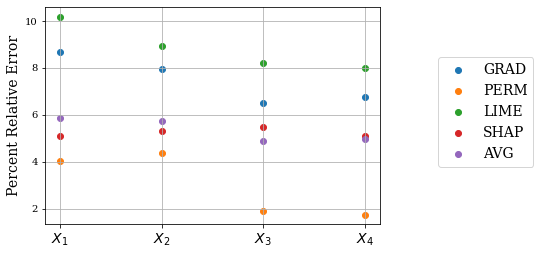

In [115]:
# Relative error 
eps = 1
rerr_grad = np.mean(np.abs(imp_gt- imp_grad)/(imp_gt+eps), 0)*100
rerr_perm = np.mean(np.abs(imp_gt- imp_perm)/(imp_gt+eps),0)*100
rerr_lime = np.mean(np.abs(imp_gt- imp_lime)/(imp_gt+eps),0)*100
rerr_shap = np.mean(np.abs(imp_gt- imp_shap)/(imp_gt+eps),0)*100
rerr_agg= np.mean(np.abs(imp_gt- imp_agg)/(imp_gt+eps),0)*100

plt.scatter(x,rerr_grad, label ='GRAD')
plt.scatter(x,rerr_perm, label ='PERM')
plt.scatter(x,rerr_lime, label ='LIME')
plt.scatter(x,rerr_shap, label ='SHAP')
plt.scatter(x,rerr_agg, label ='AVG')
plt.ylabel('Percent Relative Error', fontproperties=font)
plt.xticks(x, xlabel, fontproperties=font)
plt.grid()
plt.legend(prop=font, bbox_to_anchor=(1.48, 0.8), loc='upper right')